In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import pickle

# Set the path for the CSV file
path = "C:\\Users\\hanan\\Downloads\\TestData3.csv"


# Read the dataset from the CSV file and remove the last row
dataset = pd.read_csv(path)
dataset = dataset[:-1]
print(dataset[list(dataset.columns.values)[4]])

0      0
1      0
2      0
3      0
4      0
      ..
117    0
118    0
119    0
120    0
121    0
Name: safety, Length: 122, dtype: int64


In [7]:
# Split the dataset into training and testing sets (50-50 ratio) using stratified sampling based on 'safety' attribute
from sklearn.model_selection import train_test_split 
train, test = train_test_split(dataset, test_size=0.5, random_state=1, stratify=dataset['safety'], shuffle=True)

In [8]:
# Standardize the data using StandardScaler
from sklearn.preprocessing import StandardScaler 
ss_train = StandardScaler()
X_train = ss_train.fit_transform(train.iloc[:,4:])
y_train = train.iloc[:,4]
X_test = ss_train.transform(test.iloc[:,4:])
y_test = test.iloc[:,4]


In [9]:
print("First index \n", X_train[0])
print("Label ", y_train.iloc[0])

First index 
 [ 1.28536917  0.         -0.48840675 -0.58338941 -0.43186828 -0.50659719
 -0.51532976 -0.49780084 -0.32960566 -0.49566568 -0.58401688 -0.43347385
 -0.50771301 -0.51594138 -0.49828924 -0.32960566  0.23041984  1.09958425
 -0.64891615  1.06080933  1.41173504 -0.01643366 -0.32960566  1.42637859
  1.00604877 -0.37863474  1.09727978  1.36390077  0.32108325 -0.32960566
  0.54362445  0.84689181 -0.3894078   0.90876747  1.31673964  0.51868736
 -0.32960566  1.0296542   0.80838101 -0.38926128  0.54477618  0.46052177
  0.65105814 -0.32960566  1.12175337  0.84309306 -0.40332185  0.77499435
  0.64516914  0.87400999 -0.32960566  1.18926884  0.93379546 -0.36706755
  1.07814861  1.26626046  0.93411894 -0.32960566  1.38903846  1.08190844
 -0.25829373  1.3399936   1.54738848  1.17166869 -0.32960566  1.35098504
  1.20215774 -0.29424524  1.45433995  1.53095496  1.25052092 -0.32960566
  1.39171457  1.21216356 -0.15912568  1.40052732  1.40413029  1.15237771
 -0.32960566  1.48401785  1.31691884 

In [10]:
# Initialize several binary classifiers
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(5)


In [11]:
#evaluating performance 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [12]:
print("Unique labels in y_train:", y_train.unique())


Unique labels in y_train: [1 0]


In [13]:
accuracy, precision, recall, f1Score = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    # Make predictions
    predictions = models[key].predict(X_test)
        
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test, pos_label=1)
    recall[key] = recall_score(predictions, y_test, pos_label=1)
    f1Score[key] = f1_score(predictions, y_test, pos_label=1)

    cm = confusion_matrix(y_test, predictions, labels =[0,1])

    TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

    print(key)
    print('True Positive(TP)  = ', TP)
    print('False Positive(FP) = ', FP)
    print('True Negative(TN)  = ', TN)
    print('False Negative(FN) = ', FN)
   
    print(' ')

Logistic Regression
True Positive(TP)  =  22
False Positive(FP) =  0
True Negative(TN)  =  37
False Negative(FN) =  2
 
Support Vector Machines
True Positive(TP)  =  23
False Positive(FP) =  0
True Negative(TN)  =  37
False Negative(FN) =  1
 
Decision Trees
True Positive(TP)  =  20
False Positive(FP) =  1
True Negative(TN)  =  36
False Negative(FN) =  4
 
Random Forest
True Positive(TP)  =  22
False Positive(FP) =  1
True Negative(TN)  =  36
False Negative(FN) =  2
 
Naive Bayes
True Positive(TP)  =  24
False Positive(FP) =  0
True Negative(TN)  =  37
False Negative(FN) =  0
 
K-Nearest Neighbor
True Positive(TP)  =  22
False Positive(FP) =  0
True Negative(TN)  =  37
False Negative(FN) =  2
 


In [14]:
# Create a DataFrame to display the performance metrics for each classifier
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1 Score'] = f1Score.values()

df_model

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.967213,0.916667,1.000000,0.956522
Support Vector Machines,0.983607,0.958333,1.000000,0.978723
Decision Trees,0.918033,0.833333,0.952381,0.888889
Random Forest,0.950820,0.916667,0.956522,0.936170
Naive Bayes,1.000000,1.000000,1.000000,1.000000
K-Nearest Neighbor,0.967213,0.916667,1.000000,0.956522


Accuracy: 1.00 (+/- 0.00)


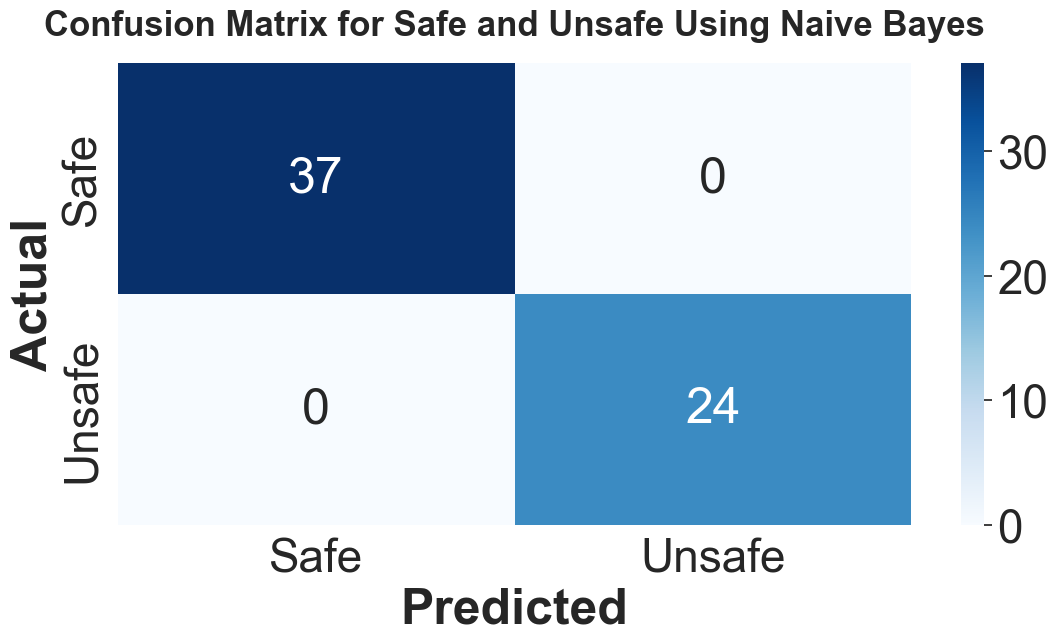

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold, cross_val_score

def plot_confusion_matrix(matrix, actual_classes, predicted_classes, sorted_labels):
    plt.figure(figsize=(12.8,6))
    sns.set(font_scale= 3)
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted', fontweight = 'bold' )
    plt.ylabel('Actual', fontweight = 'bold')
    plt.title('Confusion Matrix for Safe and Unsafe Using Naive Bayes',  pad=20, fontsize= 25, fontweight = 'bold')
    plt.show()

# Fit the NB model
nb = GaussianNB()

# 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(nb, X_train, y_train, cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Train the model on the whole training set
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb.predict(X_test)

# Generate the confusion matrix plot
cm = confusion_matrix(y_test, y_pred_nb)
sorted_labels = ['Safe', 'Unsafe']

plot_confusion_matrix(cm, y_test, y_pred_nb, sorted_labels)
